In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, FunctionTransformer, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, auc, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df  = pd.read_csv('datasets/cleaned_datasets/cleaned_phase1')
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,hours-per-week,salary
0,0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,40,0
1,1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,13,0
2,2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,40,0
3,3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,0
4,4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,40,0


In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,hours-per-week,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,40,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,13,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,40,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,40,0


In [6]:
target = "salary"
X = df.drop(columns=target)
y = df[target]

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'sex', 'hours-per-week', 'salary'],
      dtype='object')

In [8]:
X

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,hours-per-week
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,40
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,13
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,40
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,40
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,40
...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,38
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,40
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,Female,40
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,Male,20


In [9]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (26048, 9)
y_train shape: (26048,)
X_test shape: (6513, 9)
y_test shape: (6513,)


In [11]:
y_train.value_counts()

salary
0    19778
1     6270
Name: count, dtype: int64

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [13]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(12540, 9)


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,hours-per-week
1125,20,Private,117606,Assoc-voc,Never-married,Adm-clerical,Own-child,Female,40
4110,25,Private,186294,HS-grad,Never-married,Adm-clerical,Not-in-family,Female,50
15977,44,Private,222978,HS-grad,Divorced,Sales,Not-in-family,Female,40
26530,38,Self-emp-not-inc,65716,Assoc-voc,Divorced,Other-service,Unmarried,Female,40
20416,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,Female,40


In [14]:
y_train_under.value_counts()

salary
0    6270
1    6270
Name: count, dtype: int64

In [15]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(39556, 9)


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,hours-per-week
0,33,Local-gov,198183,Bachelors,Never-married,Prof-specialty,Not-in-family,Female,50
1,36,Private,86459,Assoc-voc,Married-civ-spouse,Exec-managerial,Husband,Male,50
2,58,Self-emp-not-inc,203039,9th,Separated,Craft-repair,Not-in-family,Male,40
3,21,Private,180190,Assoc-voc,Married-civ-spouse,Farming-fishing,Husband,Male,46
4,27,Private,279872,Some-college,Divorced,Other-service,Not-in-family,Male,40


In [16]:

y_train_over.value_counts()

salary
1    19778
0    19778
Name: count, dtype: int64

In [17]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.7593


In [18]:

model_reg = Pipeline(
                        steps =
    
   [              
         (
             'preprocessor', ColumnTransformer(
                  transformers =
                                 [
                                    ('categorical',  OneHotEncoder(), ['sex', 'relationship', 'marital-status', 'workclass']),
        
                                    ('ordinal', OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                                                '10th', '11th', '12th', 'HS-grad', 'Some-college',
                                                'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters',
                                                'Prof-school', 'Doctorate']]), ['education']),
        
                                    ('numerical', StandardScaler(), ['age', 'fnlwgt', 'hours-per-week'])
                                  ]
                                                )
            ),
       
         ( 
            'model', DecisionTreeClassifier()
     
         )                             
   ]
)
model_under = Pipeline(
                        steps =
    
   [              
         (
             'preprocessor', ColumnTransformer(
                  transformers =
                                 [
                                    ('categorical',  OneHotEncoder(), ['sex', 'relationship', 'marital-status', 'workclass']),
        
                                    ('ordinal', OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                                                '10th', '11th', '12th', 'HS-grad', 'Some-college',
                                                'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters',
                                                'Prof-school', 'Doctorate']]), ['education']),
        
                                    ('numerical', StandardScaler(), ['age', 'fnlwgt', 'hours-per-week'])
                                  ]
                                                )
            ),
       
         ( 
            'model', DecisionTreeClassifier()
     
         )                             
   ]
)
model_over = Pipeline(
                        steps =
    
   [              
         (
             'preprocessor', ColumnTransformer(
                  transformers =
                                 [
                                    ('categorical',  OneHotEncoder(), ['sex', 'relationship', 'marital-status', 'workclass']),
        
                                    ('ordinal', OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                                                '10th', '11th', '12th', 'HS-grad', 'Some-college',
                                                'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters',
                                                'Prof-school', 'Doctorate']]), ['education']),
        
                                    ('numerical', StandardScaler(), ['age', 'fnlwgt', 'hours-per-week'])
                                  ]
                                                )
            ),
       
         ( 
            'model', DecisionTreeClassifier()
     
         )                             
   ]
)

model_reg.fit(X_train, y_train)
model_under.fit(X_train_under, y_train_under)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  ['sex', 'relationship',
                                                   'marital-status',
                                                   'workclass']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              '1st-4th',
                                                                              '5th-6th',
                                                                              '7th-8th',
                                                                              '9th',
                                                                              '10th',
                                                                              '11th',
                                                                              '12th',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc-acdm',
                                                                              'Assoc-voc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate']]),
                                                  ['education']),
                                                 ('numerical', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'hours-per-week'])])),
                ('model', DecisionTreeClassifier())])

In [19]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9995
Test Accuracy: 0.7659
Training Accuracy: 0.857
Test Accuracy: 0.7238
Training Accuracy: 0.9995
Test Accuracy: 0.7771


## We can see that model in which we used oversampled data worked well among all three models

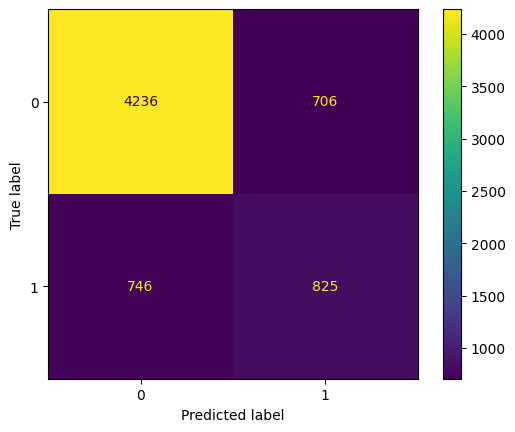

In [20]:
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test);


In [21]:
depth = model_over.named_steps["model"].get_depth()
print(depth)

56


In [22]:
clf = Pipeline(
                        steps =
    
   [              
         (
             'preprocessor', ColumnTransformer(
                  transformers =
                                 [
                                    ('categorical',  OneHotEncoder(), ['sex', 'relationship', 'marital-status', 'workclass']),
        
                                    ('ordinal', OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                                                '10th', '11th', '12th', 'HS-grad', 'Some-college',
                                                'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters',
                                                'Prof-school', 'Doctorate']]), ['education']),
        
                                    ('numerical', StandardScaler(), ['age', 'fnlwgt', 'hours-per-week'])
                                  ]
                                                )
            ),
       
         ( 
            'model', RandomForestClassifier()
     
         )                             
   ]
)

In [23]:
params = {
    "model__n_estimators": range(25,100,25),
    "model__max_depth":range(10, 50, 10)      
}
params

{'model__n_estimators': range(25, 100, 25),
 'model__max_depth': range(10, 50, 10)}

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
model = GridSearchCV(
    clf, 
    param_grid = params,
    cv = 5,
    n_jobs = -1,
    verbose = 3
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         OneHotEncoder(),
                                                                         ['sex',
                                                                          'relationship',
                                                                          'marital-status',
                                                                          'workclass']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(categories=[['Preschool',
                                                                                                     '1st-4th',
                                                                                                     '5th-6th',
                                                                                                     '7th-8th',
                                                                                                     '9th',
                                                                                                     '10th',
                                                                                                     '11th',
                                                                                                     '12th',
                                                                                                     'HS-grad',
                                                                                                     'Some-college',
                                                                                                     'Assoc-acdm',
                                                                                                     'Assoc-voc',
                                                                                                     'Bachelors',
                                                                                                     'Masters',
                                                                                                     'Prof-school',
                                                                                                     'Doctorate']]),
                                                                         ['education']),
                                                                        ('numerical',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'hours-per-week'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': range(10, 50, 10),
                         'model__n_estimators': range(25, 100, 25)},
             verbose=3)

In [26]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         OneHotEncoder(),
                                                                         ['sex',
                                                                          'relationship',
                                                                          'marital-status',
                                                                          'workclass']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(categories=[['Preschool',
                                                                                                     '1st-4th',
                                                                                                     '5th-6th',
                                                                                                     '7th-8th',
                                                                                                     '9th',
                                                                                                     '10th',
                                                                                                     '11th',
                                                                                                     '12th',
                                                                                                     'HS-grad',
                                                                                                     'Some-college',
                                                                                                     'Assoc-acdm',
                                                                                                     'Assoc-voc',
                                                                                                     'Bachelors',
                                                                                                     'Masters',
                                                                                                     'Prof-school',
                                                                                                     'Doctorate']]),
                                                                         ['education']),
                                                                        ('numerical',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'hours-per-week'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': range(10, 50, 10),
                         'model__n_estimators': range(25, 100, 25)},
             verbose=3)

In [27]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.874055,0.099441,0.075826,0.014252,10,25,"{'model__max_depth': 10, 'model__n_estimators'...",0.818504,0.818607,0.828972,0.823284,0.818860,0.821645,0.004080,12
1,5.725602,0.113401,0.114206,0.011012,10,50,"{'model__max_depth': 10, 'model__n_estimators'...",0.822801,0.816079,0.833270,0.825433,0.822020,0.823921,0.005587,10
2,8.861119,0.239682,0.158078,0.011887,10,75,"{'model__max_depth': 10, 'model__n_estimators'...",0.821663,0.818860,0.832259,0.823916,0.820503,0.823440,0.004707,11
3,10.009763,0.649883,0.108102,0.018988,20,25,"{'model__max_depth': 20, 'model__n_estimators'...",0.881699,0.879156,0.902035,0.894198,0.898243,0.891066,0.009069,9
4,21.895916,0.897128,0.184861,0.019314,20,50,"{'model__max_depth': 20, 'model__n_estimators'...",0.884479,0.882569,0.902162,0.896220,0.896347,0.892355,0.007548,8
5,30.946018,1.067680,0.222072,0.006618,20,75,"{'model__max_depth': 20, 'model__n_estimators'...",0.886628,0.883074,0.902288,0.896852,0.898875,0.893544,0.007393,7
6,12.716212,0.464818,0.112152,0.002191,30,25,"{'model__max_depth': 30, 'model__n_estimators'...",0.899772,0.900897,0.917457,0.916572,0.918089,0.910557,0.008368,6
7,24.275267,0.344086,0.177333,0.007795,30,50,"{'model__max_depth': 30, 'model__n_estimators'...",0.905081,0.901530,0.921628,0.919858,0.920743,0.913768,0.008635,3
8,36.343340,0.809120,0.260569,0.017205,30,75,"{'model__max_depth': 30, 'model__n_estimators'...",0.904196,0.902667,0.919732,0.920870,0.920238,0.913541,0.008276,4
9,12.621882,0.189344,0.113651,0.011222,40,25,"{'model__max_depth': 40, 'model__n_estimators'...",0.902553,0.902035,0.920111,0.919479,0.921502,0.913136,0.008878,5


In [28]:
model.best_params_

{'model__max_depth': 40, 'model__n_estimators': 50}

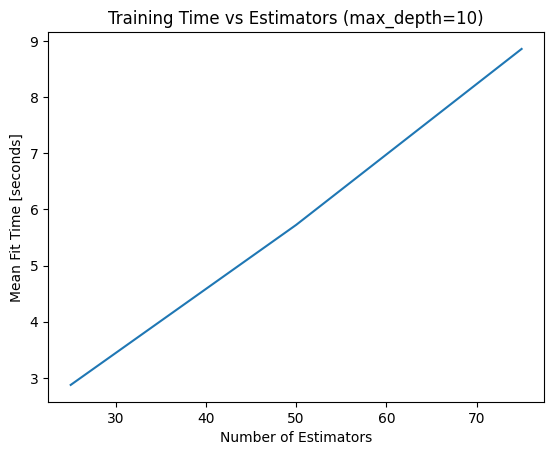

In [29]:
mask = cv_results["param_model__max_depth"] == 10
# Plot fit time vs n_estimators
plt.plot(
    cv_results[mask]["param_model__n_estimators"],
    cv_results[mask]["mean_fit_time"]
)

# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

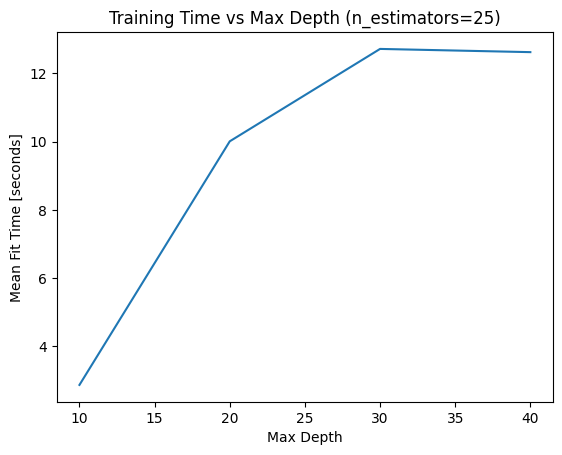

In [30]:
mask = cv_results["param_model__n_estimators"] == 25
# Plot fit time vs max_depth
plt.plot(
    cv_results[mask]["param_model__max_depth"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [31]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9992
Test Accuracy: 0.8059


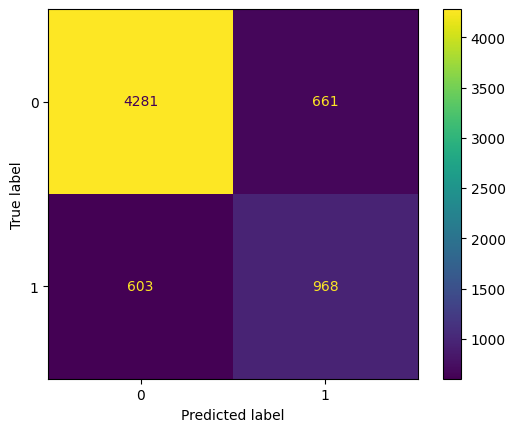

In [32]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);


In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
clf2  = Pipeline(
                        steps =
    
   [              
         (
             'preprocessor', ColumnTransformer(
                  transformers =
                                 [
                                    ('categorical',  OneHotEncoder(), ['sex', 'relationship', 'marital-status', 'workclass']),
        
                                    ('ordinal', OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                                                '10th', '11th', '12th', 'HS-grad', 'Some-college',
                                                'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters',
                                                'Prof-school', 'Doctorate']]), ['education']),
        
                                    ('numerical', StandardScaler(), ['age', 'fnlwgt', 'hours-per-week'])
                                  ]
                                                )
            ),
       
         ( 
            'model',GradientBoostingClassifier()
     
         )                             
   ]
)

In [34]:
params = {
    "model__n_estimators": range(20, 31, 5),
    "model__max_depth": range(2, 5)
    
    
}
params

{'model__n_estimators': range(20, 31, 5), 'model__max_depth': range(2, 5)}

In [35]:
model2 = GridSearchCV(clf2, param_grid = params, cv=5, n_jobs= -1, verbose = 3)

In [36]:
model2.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         OneHotEncoder(),
                                                                         ['sex',
                                                                          'relationship',
                                                                          'marital-status',
                                                                          'workclass']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(categories=[['Preschool',
                                                                                                     '1st-4th',
                                                                                                     '5th-6th',
                                                                                                     '7th-8th',
                                                                                                     '9th',
                                                                                                     '10th',
                                                                                                     '11th',
                                                                                                     '12th',
                                                                                                     'HS-grad',
                                                                                                     'Some-college',
                                                                                                     'Assoc-acdm',
                                                                                                     'Assoc-voc',
                                                                                                     'Bachelors',
                                                                                                     'Masters',
                                                                                                     'Prof-school',
                                                                                                     'Doctorate']]),
                                                                         ['education']),
                                                                        ('numerical',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'hours-per-week'])])),
                                       ('model',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': range(2, 5),
                         'model__n_estimators': range(20, 31, 5)},
             verbose=3)

In [37]:
model2.best_params_

{'model__max_depth': 4, 'model__n_estimators': 30}

In [38]:
results = pd.DataFrame(model2.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,3.486628,0.257178,0.029413,0.003562,4,30,"{'model__max_depth': 4, 'model__n_estimators':...",0.806623,0.804450,0.813424,0.812160,0.811528,0.809637,0.003472,1
7,3.568202,0.042869,0.046600,0.004317,4,25,"{'model__max_depth': 4, 'model__n_estimators':...",0.806623,0.804070,0.813045,0.810011,0.809632,0.808676,0.003073,2
5,3.228004,0.060262,0.043800,0.003124,3,30,"{'model__max_depth': 3, 'model__n_estimators':...",0.805485,0.803944,0.813424,0.808115,0.809506,0.808095,0.003300,3
6,2.912605,0.059707,0.045598,0.004225,4,20,"{'model__max_depth': 4, 'model__n_estimators':...",0.804601,0.805334,0.811023,0.808115,0.807104,0.807235,0.002267,4
4,2.716003,0.058457,0.045800,0.002482,3,25,"{'model__max_depth': 3, 'model__n_estimators':...",0.801694,0.802933,0.814183,0.807736,0.807230,0.806755,0.004395,5
3,2.247802,0.103892,0.041802,0.001326,3,20,"{'model__max_depth': 3, 'model__n_estimators':...",0.799545,0.796233,0.813930,0.805082,0.801416,0.803241,0.006062,6
2,2.473401,0.088422,0.042800,0.002400,2,30,"{'model__max_depth': 2, 'model__n_estimators':...",0.799166,0.793579,0.809127,0.803059,0.800152,0.801016,0.005088,7
1,2.545402,0.239720,0.053000,0.011296,2,25,"{'model__max_depth': 2, 'model__n_estimators':...",0.794742,0.794337,0.808115,0.801669,0.797371,0.799247,0.005147,8
0,2.207595,0.185781,0.055194,0.011078,2,20,"{'model__max_depth': 2, 'model__n_estimators':...",0.790824,0.789407,0.803691,0.798382,0.793958,0.795252,0.005224,9


In [39]:
acc_train = model2.score(X_train, y_train)
acc_test = model2.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.7875
Validation Accuracy: 0.789


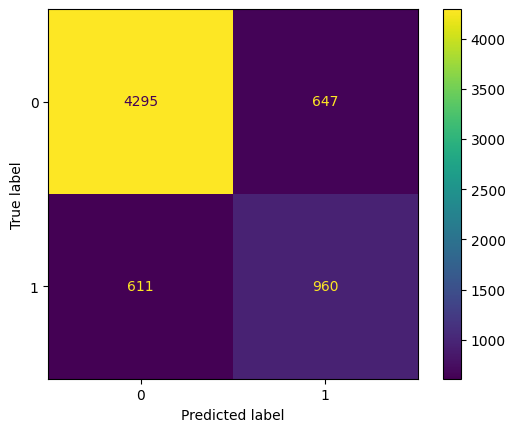

In [40]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

## We can see that RandomForestClassifier is the best performing model for us 

In [34]:
input=pd.DataFrame({"age":[39],"workclass":["State-gov"],"fnlwgt":[77516],"education":["Bachelors"],"marital-status":["Never-married"],"occupation":["Adm-clerical"],"relationship":["Not-in-family"],"sex":["Male"],"hours-per-week":[40]})

In [44]:
model.best_estimator_.predict(pd.DataFrame({"age":[39],"workclass":["State-gov"],"fnlwgt":[77516],"education":["Bachelors"],"marital-status":["Never-married"],"occupation":["Adm-clerical"],"relationship":["Not-in-family"],"sex":["Male"],"hours-per-week":[40]}))[0]

0

In [45]:
model.predict(input)[0]

0

In [35]:
import joblib

In [37]:
joblib.dump(model.best_estimator_, "final_model_3.pkl")

['final_model_3.pkl']

In [38]:
import joblib

file_path = "final_model_3.pkl"

# Load the model with compatibility mode
with open(file_path, 'rb') as file:
    data = joblib.load(file)


In [39]:
data.predict(input)[0]

0

In [40]:
type(data)

sklearn.pipeline.Pipeline

In [9]:
data.predict(input)[0]

0